In [5]:
import pandas as pd
data=pd.read_csv(r"C:\Users\kuruv\OneDrive\Documents\sample.csv")
data

,Name,Domain,Age,Location,Salary,Exp
0,NaN,Mike Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,NaN,Uma#r Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [6]:
data.columns

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

In [15]:
data.shape

(6, 6)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      4 non-null      object
 1   Domain    6 non-null      object
 2   Age       4 non-null      object
 3   Location  4 non-null      object
 4   Salary    6 non-null      object
 5   Exp       5 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


In [11]:
data.isnull()

,Name,Domain,Age,Location,Salary,Exp
0,True,False,False,False,False,False
1,False,False,False,False,False,False
2,True,False,True,True,False,False
3,False,False,True,False,False,True
4,False,False,False,True,False,False
5,False,False,False,False,False,False


In [12]:
data.isnull().sum()

Name        2
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

In [13]:
data['Name']
data

,Name,Domain,Age,Location,Salary,Exp
0,NaN,Mike Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,NaN,Uma#r Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [14]:
data['Name']=data['Name'].replace(r'\W','')
data['Name']


0       NaN
1    Teddy^
2       NaN
3      Jane
4    Uttam*
5       Kim
Name: Name, dtype: object

In [15]:
data['Name']=data['Name'].replace(r'\W','',regex=True)
data['Name']

0      NaN
1    Teddy
2      NaN
3     Jane
4    Uttam
5      Kim
Name: Name, dtype: object

In [16]:
data=data.replace(r'\W','',regex=True)
data

,Name,Domain,Age,Location,Salary,Exp
0,NaN,MikeDatascience,34years,Mumbai,5000,2
1,Teddy,Testing,45yr,Bangalore,10000,3
2,NaN,UmarDataanalyst,NaN,NaN,15000,4yrs
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67yr,NaN,30000,5year
5,Kim,NLP,55yr,Delhi,60000,10


In [17]:
data['Exp']=data['Exp'].str.extract('(\d+)')
data

,Name,Domain,Age,Location,Salary,Exp
0,NaN,MikeDatascience,34years,Mumbai,5000,2
1,Teddy,Testing,45yr,Bangalore,10000,3
2,NaN,UmarDataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67yr,NaN,30000,5
5,Kim,NLP,55yr,Delhi,60000,10


In [18]:
data['Age']=data['Age'].str.extract('(\d+)')
data

,Name,Domain,Age,Location,Salary,Exp
0,NaN,MikeDatascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,NaN,UmarDataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [20]:
clean=data.copy()
data

,Name,Domain,Age,Location,Salary,Exp
0,NaN,MikeDatascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,NaN,UmarDataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [22]:
import numpy as np
clean['Age']=clean['Age'].fillna(np.mean(pd.to_numeric(clean['Age'])))
clean

,Name,Domain,Age,Location,Salary,Exp
0,NaN,MikeDatascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,NaN,UmarDataanalyst,50.25,NaN,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [23]:
clean['Exp']=clean['Exp'].fillna(np.mean(pd.to_numeric(clean['Exp'])))
clean

,Name,Domain,Age,Location,Salary,Exp
0,NaN,MikeDatascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,NaN,UmarDataanalyst,50.25,NaN,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [24]:
clean['Name']=clean['Name'].fillna(clean['Name'].mode()[0])
clean

,Name,Domain,Age,Location,Salary,Exp
0,Jane,MikeDatascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Jane,UmarDataanalyst,50.25,NaN,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [25]:
clean['Location']=clean['Location'].fillna(clean['Location'].mode()[0])
clean

,Name,Domain,Age,Location,Salary,Exp
0,Jane,MikeDatascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Jane,UmarDataanalyst,50.25,Bangalore,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [26]:
clean

,Name,Domain,Age,Location,Salary,Exp
0,Jane,MikeDatascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Jane,UmarDataanalyst,50.25,Bangalore,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [27]:
clean.isnull()
# Checks for any empty values in dataframe

,Name,Domain,Age,Location,Salary,Exp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False


In [28]:
clean.info()
# All attributes dtype is object so we change system object user defined type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       6 non-null      object
 3   Location  6 non-null      object
 4   Salary    6 non-null      object
 5   Exp       6 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


In [34]:
clean

,Name,Domain,Age,Location,Salary,Exp
0,Jane,MikeDatascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Jane,UmarDataanalyst,50.25,Bangalore,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [38]:
clean.Name=clean.Name.astype('category')
clean.Domain=clean.Domain.astype('category')
clean.Location=clean.Location.astype('category')
clean.Age=clean.Age.astype('int')
clean.Salary=clean.Salary.astype('int')
clean.Exp=clean.Exp.astype('int')
clean.info()
# changed objects to category type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      6 non-null      category
 1   Domain    6 non-null      category
 2   Age       6 non-null      int32   
 3   Location  6 non-null      category
 4   Salary    6 non-null      int32   
 5   Exp       6 non-null      int32   
dtypes: category(3), int32(3)
memory usage: 850.0 bytes


In [39]:
clean

,Name,Domain,Age,Location,Salary,Exp
0,Jane,MikeDatascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Jane,UmarDataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [40]:
clean.to_csv('clean.csv')
# This method is builtin function in pandas tha allows you to save a pandas dataframe as csv file

In [41]:
import os

In [42]:
os.getcwd()
# shows path where it is saved

'C:\\Users\\kuruv'

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [44]:
warnings.filterwarnings('ignore')

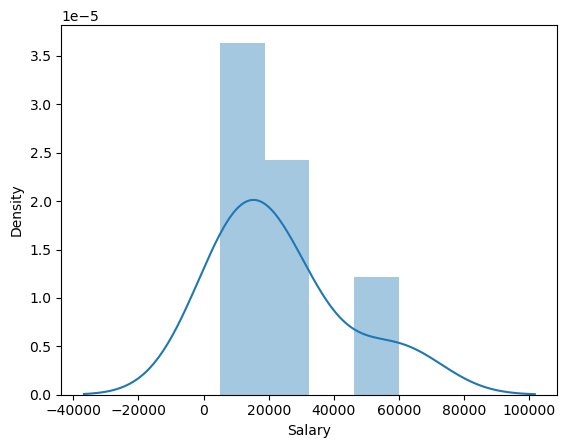

In [49]:
vis1=sns.distplot(clean.Salary)

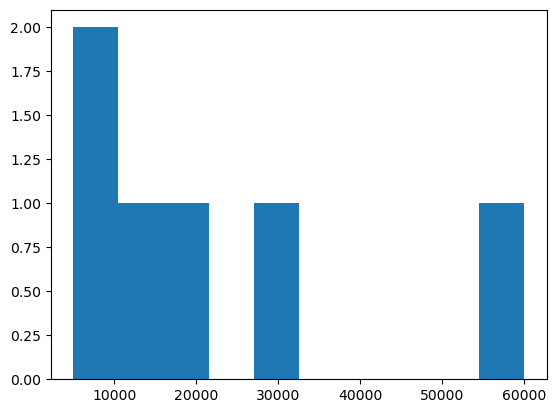

In [50]:
vis2=plt.hist(clean.Salary)

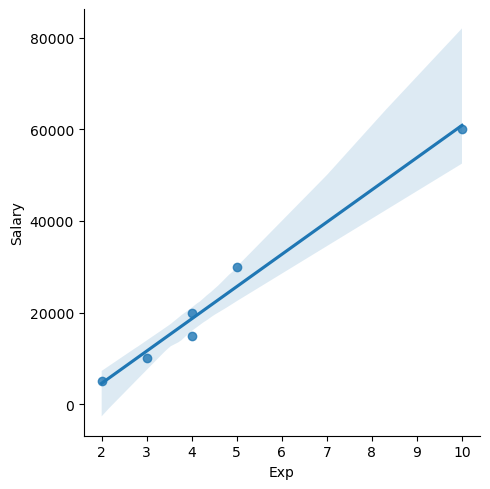

In [51]:
vis3=sns.lmplot(data=clean,x="Exp",y="Salary")
# Bivariant analysis

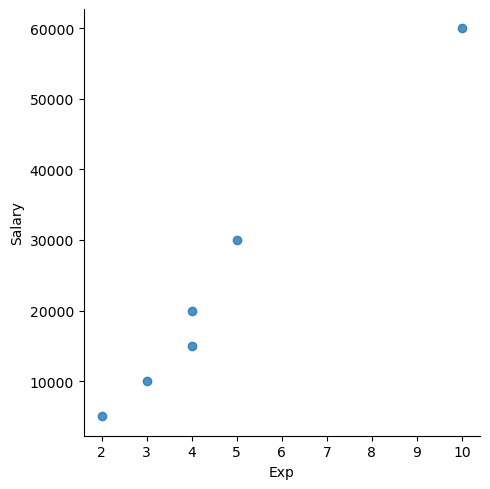

In [52]:
vis3=sns.lmplot(data=clean,x='Exp',y='Salary',fit_reg=False)

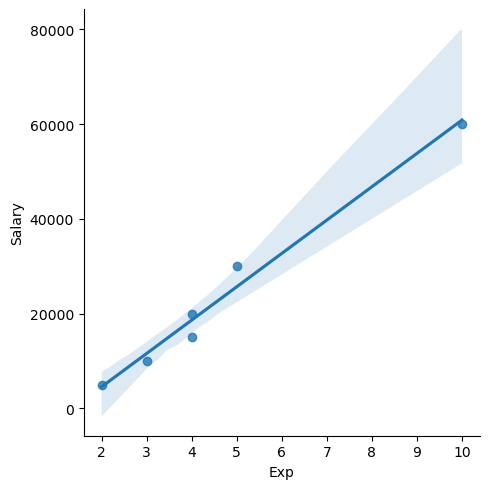

In [54]:
vis3=sns.lmplot(data=clean,x='Exp',y='Salary',fit_reg=True)

In [56]:
clean

,Name,Domain,Age,Location,Salary,Exp
0,Jane,MikeDatascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Jane,UmarDataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [58]:
x=clean.drop(['Salary'],axis=1)
x
# It contains only independent variable

,Name,Domain,Age,Location,Exp
0,Jane,MikeDatascience,34,Mumbai,2
1,Teddy,Testing,45,Bangalore,3
2,Jane,UmarDataanalyst,50,Bangalore,4
3,Jane,Analytics,50,Hyderbad,4
4,Uttam,Statistics,67,Bangalore,5
5,Kim,NLP,55,Delhi,10


In [59]:
clean

,Name,Domain,Age,Location,Salary,Exp
0,Jane,MikeDatascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Jane,UmarDataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [63]:
y=clean.drop(['Name','Domain','Age','Location','Exp'],axis=1)
y
# salary is only one dependent variable

,Salary
0,5000
1,10000
2,15000
3,20000
4,30000
5,60000


In [64]:
clean

,Name,Domain,Age,Location,Salary,Exp
0,Jane,MikeDatascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Jane,UmarDataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [77]:
x

,Name,Domain,Age,Location,Exp
0,Jane,MikeDatascience,34,Mumbai,2
1,Teddy,Testing,45,Bangalore,3
2,Jane,UmarDataanalyst,50,Bangalore,4
3,Jane,Analytics,50,Hyderbad,4
4,Uttam,Statistics,67,Bangalore,5
5,Kim,NLP,55,Delhi,10


In [66]:
y

,Salary
0,5000
1,10000
2,15000
3,20000
4,30000
5,60000


In [80]:
imputation=pd.get_dummies(clean)
imputation

,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Teddy,Name_Uttam,Domain_Analytics,Domain_MikeDatascience,Domain_NLP,Domain_Statistics,Domain_Testing,Domain_UmarDataanalyst,Location_Bangalore,Location_Delhi,Location_Hyderbad,Location_Mumbai
0,34,5000,2,True,False,False,False,False,True,False,False,False,False,False,False,False,True
1,45,10000,3,False,False,True,False,False,False,False,False,True,False,True,False,False,False
2,50,15000,4,True,False,False,False,False,False,False,False,False,True,True,False,False,False
3,50,20000,4,True,False,False,False,True,False,False,False,False,False,False,False,True,False
4,67,30000,5,False,False,False,True,False,False,False,True,False,False,True,False,False,False
5,55,60000,10,False,True,False,False,False,False,True,False,False,False,False,True,False,False


In [72]:
imputation=imputation.astype('int')
imputation.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     6 non-null      int32
 1   Salary                  6 non-null      int32
 2   Exp                     6 non-null      int32
 3   Name_Jane               6 non-null      int32
 4   Name_Kim                6 non-null      int32
 5   Name_Teddy              6 non-null      int32
 6   Name_Uttam              6 non-null      int32
 7   Domain_Analytics        6 non-null      int32
 8   Domain_MikeDatascience  6 non-null      int32
 9   Domain_NLP              6 non-null      int32
 10  Domain_Statistics       6 non-null      int32
 11  Domain_Testing          6 non-null      int32
 12  Domain_UmarDataanalyst  6 non-null      int32
 13  Location_Bangalore      6 non-null      int32
 14  Location_Delhi          6 non-null      int32
 15  Location_Hyderbad       6 n